In [1]:
import numpy as np


## line search for adaptive step size

In [2]:
np.random.seed(0)

## Generate Data

In [3]:
n, d = 100, 3
X = np.random.rand(n, d)
X.shape

(100, 3)

In [4]:
w_gt = np.array([1,2,3])
w_gt.shape

(3,)

In [5]:
error = np.random.randn(100,1)

In [6]:
y = X @ w_gt.reshape(-1, 1) + error
y.shape

(100, 1)

In [7]:
#for w0 adding 1 for the general dimensionality purpose according to formula
X = np.hstack((np.ones((n,1)), X))

X.shape


(100, 4)

## Gradient decent
defined limitations in problems
- number of iterations (max defined)
- error diff

In [8]:
def gradient(X, y, w):
    n, d = X.shape
    grad = X.T @ ((X @ w) - y) / n
    return grad

In [9]:
X.shape

(100, 4)

In [10]:
#lets test
gradient(X, y, np.zeros((X.shape[1], 1)))

array([[-2.90928278],
       [-1.5532363 ],
       [-1.56101271],
       [-1.76752543]])

In [62]:
def gradient_descent(X,y, num_iter):
    #randomly initialize w, here we took zero but it can be anything
    n, d = X.shape
    w = np.zeros((d, 1))
    costs = [cost_function(X,y,w)]
    for _ in range(num_iter):
        step_size = line_search(X,y, w)
        w = w - step_size * gradient(X, y, w)

        costs.append(cost_function(X,y,w))
    return w, costs

In [16]:
def cost_function(X,y,w):
    y_pred = X @ w
    n, d = X.shape
    return np.sum((y - y_pred) ** 2) / (2 * n)

In [42]:
def line_search(X, y, w, alpha=0.001, beta=0.5):
    old_cost = cost_function(X,y, w)
    step_size = 10.0 #randomly to big number
    grad = gradient(X, y, w)
    new_cost = cost_function(X, y, w - step_size * grad)
    while cost_function(X, y, w - step_size * grad) > old_cost + alpha:
        step_size = beta * step_size #update stepsize with shib
    return step_size

In [64]:
w ,costs = gradient_descent(X,y, 1000)


In [54]:
w

array([[-0.07627808],
       [ 0.57724156],
       [ 1.96648145],
       [ 3.23872071]])

In [58]:
w

array([[-0.07627808],
       [ 0.57724156],
       [ 1.96648145],
       [ 3.23872071]])

In [55]:
w_mle = np.linalg.inv(X.T @ X) @ X.T @ y

In [56]:
w_mle

array([[-0.0497861 ],
       [ 0.59132477],
       [ 1.97995663],
       [ 3.25323099]])

In [65]:
costs

[5.239743328483836,
 0.7369734174371264,
 0.6516584677296361,
 0.6235219441524275,
 0.5455845708818423,
 0.5316416838653027,
 0.5289896359594586,
 0.5032255354531788,
 0.4937518654100766,
 0.4701505833485619,
 0.4653640162383681,
 0.4642955479974295,
 0.4649466174691231,
 0.45366649713222484,
 0.4506617397711895,
 0.4498527237757031,
 0.44988418841423417,
 0.44446969261496955,
 0.444113267343539,
 0.43903182069589336,
 0.43841629972677576,
 0.4383495400269296,
 0.4386395591311913,
 0.43944139480115735,
 0.4358087183018115,
 0.43569152090259683,
 0.43577552379168993,
 0.43610546129340055,
 0.4367968886742423,
 0.4341796568333105,
 0.43426019024125895,
 0.434388216425152,
 0.43468882288229194,
 0.4352476530295783,
 0.4361999271395947,
 0.4332716725910707,
 0.43362177999743673,
 0.4338717461801334,
 0.43430763392511496,
 0.4350289901148367,
 0.432892262146856,
 0.433186289830186,
 0.4333845203780799,
 0.4337173552502191,
 0.43425798504664853,
 0.43512112653043183,
 0.4326882393726953,
 0.

In [67]:
import matplotlib.pyplot as plt

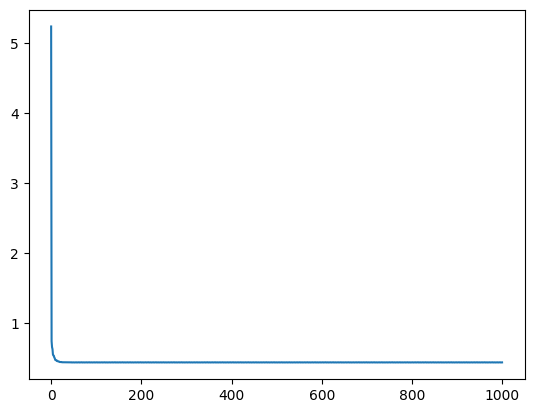

In [69]:
plt.plot(
    range(len(costs)),
    costs
)